<img align="right" src = "https://raw.githubusercontent.com/arsilva87/statsbook/main/figs/figura_thumbnail.png" width="25%" height="25%">

Códigos em R do livro: **Estatística Decodificada** (Silva, A.R. 2021) 

Capítulo 10: **Introdução aos testes de hipóteses**
____

**Exemplo de introdução**

$H_0: \mu = 4.2$ versus $H_1: \mu > 4.2$

In [1]:
1 - pnorm(q = 4.6, mean = 4.2, sd = 0.158)  # p-valor = P(media > 4.6) = 1 - P(media <= 4.6)
qnorm(p = 0.95, mean = 4.2, sd = 0.158)     # valor tabelado

[1] 0.005676434

[1] 4.459887

In [2]:
# Teste z para uma média
1 - pnorm(q = 2.531, mean = 0, sd = 1)

[1] 0.005686892

___
**Teste t para uma média**

In [3]:
# dados de exemplo
x <- c(3.80, 4.63, 4.88, 4.58, 4.95, 4.76, 4.37, 5.66, 4.31, 4.06)

In [4]:
# média e desvio padrão
mean(x)
sd(x)

[1] 4.6

[1] 0.518545

In [5]:
# p-valor após obter a estatística de teste t = 2.45
1 - pt(q = 2.45, df = 10-1)

[1] 0.01837836

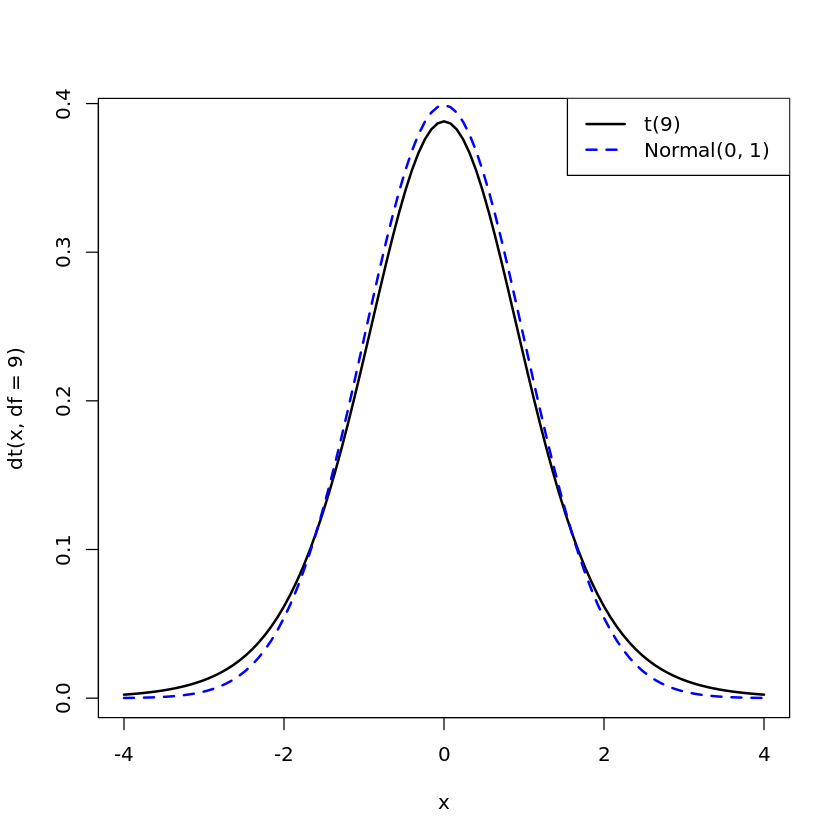

In [7]:
# curva normal padrão e curva t com 9 graus de liberdade
curve(dt(x, df = 9), from = -4, to = 4, lwd = 2)
curve(dnorm(x, mean = 0, sd = 1), add = TRUE, lwd = 2, lty = 2, col = "blue")
legend("topright", c("t(9)", "Normal(0, 1)"), lty = 1:2, lwd = 2, col = c("black", "blue"))

In [8]:
# teste t com a função t.test
t.test(x = x, alternative = "greater", mu = 4.2)


	One Sample t-test

data:  x
t = 2.4393, df = 9, p-value = 0.0187
alternative hypothesis: true mean is greater than 4.2
95 percent confidence interval:
 4.299409      Inf
sample estimates:
mean of x 
      4.6 


In [9]:
# teste t bilateral
t.test(x = x, alternative = "two.sided", mu = 4.2)


	One Sample t-test

data:  x
t = 2.4393, df = 9, p-value = 0.0374
alternative hypothesis: true mean is not equal to 4.2
95 percent confidence interval:
 4.229055 4.970945
sample estimates:
mean of x 
      4.6 


____
**Teste t para duas médias**

$H_0: \mu_1 = \mu_2$ versus $H_1: \mu_1 \neq \mu_2$

In [10]:
# dados de exemplo
g1 <- c(340.1, 375, 322.2, 331.5, 353.1, 299.1, 336.1, 283)  # grupo 1
mean(g1)
sd(g1)
var(g1)

[1] 330.0125

[1] 29.09278

[1] 846.3898

In [11]:
g2 <- c(291.7, 270.9, 327, 336.9, 298.8, 285.1, 289.6)   # grupo 2
mean(g2)
sd(g2)
var(g2)

[1] 300

[1] 23.58644

[1] 556.32

In [12]:
# teste F para igualdade de variâncias
var.test(x = g1, y = g2, alternative = "greater")


	F test to compare two variances

data:  g1 and g2
F = 1.5214, num df = 7, denom df = 6, p-value = 0.3127
alternative hypothesis: true ratio of variances is greater than 1
95 percent confidence interval:
 0.3616667       Inf
sample estimates:
ratio of variances 
          1.521408 


In [13]:
# teste t para comparação das médias dos dois grupos
t.test(x = g1, y = g2, var.equal = TRUE)


	Two Sample t-test

data:  g1 and g2
t = 2.1725, df = 13, p-value = 0.0489
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  0.1672373 59.8577627
sample estimates:
mean of x mean of y 
 330.0125  300.0000 


___
**Teste t para dados pareados**

In [14]:
y <- c(4.08, 3.46, 4.16, 4.49, 4.51, 4.31, 4.64, 3.27, 4.65, 4.72)   # concentração de potássio antes da dieta
x <- c(3.80, 4.63, 4.88, 4.58, 4.95, 4.76, 4.37, 5.66, 4.31, 4.06)   # concentração após a dieta

In [15]:
# teste t pareado
t.test(x, y, paired = TRUE, alternative = "greater")


	Paired t-test

data:  x and y
t = 1.3, df = 9, p-value = 0.1129
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.1521314        Inf
sample estimates:
mean of the differences 
                  0.371 


____
**Testes sobre tabelas de contingência**

*Exemplo 1: nematoides*

In [16]:
# Teste de qui-quadrado
x <- matrix(c(21, 13,  4, 12), nrow = 2)
qui <- chisq.test(x, correct = FALSE)
qui


	Pearson's Chi-squared test

data:  x
X-squared = 5.8824, df = 1, p-value = 0.01529


In [17]:
# Teste exato de Fisher
fisher.test(x, alternative = "greater")


	Fisher's Exact Test for Count Data

data:  x
p-value = 0.01608
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 1.347139      Inf
sample estimates:
odds ratio 
  4.687663 


*Exemplo 2: broca em arroz*

In [18]:
X <- matrix(c(8, 7, 5, 2, 0, 1, 5, 5, 2, 2, 0, 3), nrow = 4)  # n. de plantas em cada classe de resistência
rownames(X) <- letters[1:4]
colnames(X) <- c("R", "S", "MS")
X

,R,S,MS
a,8,0,2
b,7,1,2
c,5,5,0
d,2,5,3


In [19]:
P <- X/10   # proporção de plantas em cada classe
P

,R,S,MS
a,0.8,0.0,0.2
b,0.7,0.1,0.2
c,0.5,0.5,0.0
d,0.2,0.5,0.3


In [20]:
cm <- colMeans(P)             # proporção média de cada classe
cm
P0 <- rbind(cm, cm, cm, cm)   # matriz P considerando H0: proporções iguais entre as 3 classes
P0

R     S    MS 
0.550 0.275 0.175

,R,S,MS
cm,0.55,0.275,0.175
cm,0.55,0.275,0.175
cm,0.55,0.275,0.175
cm,0.55,0.275,0.175


In [21]:
# Teste da razão de verossimilhanças (TRV) multinomial
logL.ML <- dmultinom(x = X, prob = P, log = TRUE)    # logL irrestrita
logL.H0 <- dmultinom(x = X, prob = P0, log = TRUE)   # logL sob H0
LR <- 2*(logL.ML - logL.H0)                          # estatística de teste
LR
1 - pchisq(LR, df = 3*2 - 2)                         # p-valor

[1] 18.60763

[1] 0.0009384327

___
**Intervalos de confiança**

In [22]:
# retomando os dados do exemplo inicial
x <- c(3.80, 4.63, 4.88, 4.58, 4.95, 4.76, 4.37, 5.66, 4.31, 4.06)

In [23]:
# IC de 95% para a variância populacional
n <- length(x)
n
var(x)  
q1 <- qchisq(p = 0.975, df = n-1)   # da tabela de qui-quadrado com n-1 graus de liberdade
q1
q2 <- qchisq(p = 0.025, df = n-1)
q2

# IC
(n-1)*var(x)/q1                     # limite inferior
(n-1)*var(x)/q2                     # limite superior

[1] 10

[1] 0.2688889

[1] 19.02277

[1] 2.700389

[1] 0.127216

[1] 0.896167